In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

/Users/pokutnik/anaconda3/envs/ekans/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
cc = pd.read_csv('./posts_ccompare_raw.csv', index_col=0)
cc['Timestamp'] = pd.to_datetime(cc['Timestamp'])

# Reaction features

In [3]:
features_reactions = pd.DataFrame(index=cc.index)
features_reactions['n_up'] = cc['Actions.Agree.Total']
features_reactions['n_down'] = cc['Actions.Disagree.Total']
features_reactions['n_reply'] = cc['Actions.Comment.Total']

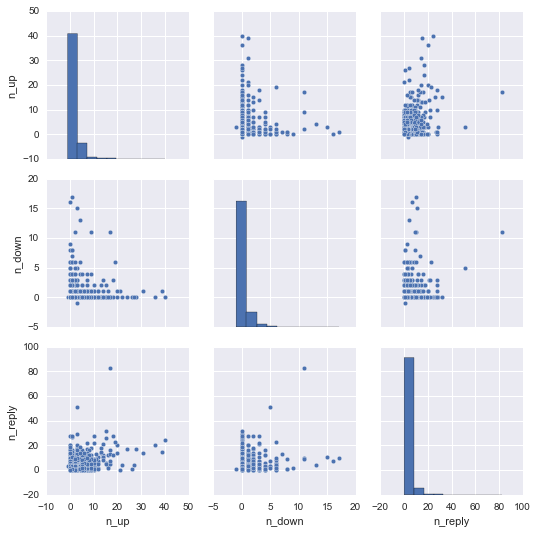

In [4]:
sns.pairplot(features_reactions)

# Post date features

In [5]:
features_date = pd.DataFrame(index=cc.index)
features_date['t_week'] = cc.Timestamp.dt.week
features_date['t_dow'] = cc.Timestamp.dt.dayofweek
features_date['t_hour'] = cc.Timestamp.dt.hour
features_date['t_day'] = cc.Timestamp.dt.day

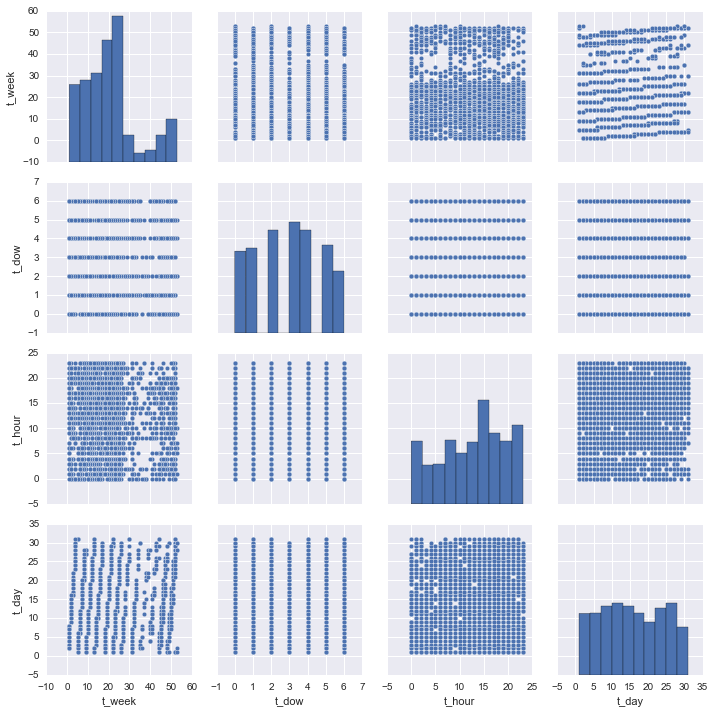

In [6]:
sns.pairplot(features_date)

# Other ...

# Target

In [7]:
targets = pd.read_csv('./btc-ind.csv')
targets['date'] = pd.to_datetime(targets['Date'])
targets = targets.set_index('date')
del targets['Date']
targets.tail()

,BTC_pd_T0,BTC_v_T0,BTC_pd_T1,BTC_rpd_T1,BTC_v_T1,BTC_s_T1,BTC_pd_T2,BTC_v_T2,BTC_s_T2,BTC_dl_m3,...,BTC_log_s_T2,BTC_cbrt_rpd_T0,BTC_cbrt_hl_T0,BTC_cbrt_pd_T1,BTC_cbrt_dv_T1,BTC_cbrt_hl_T1,BTC_cbrt_pd_T2,BTC_cbrt_dl_m3,BTC_cbrt_do_m3,BTC_cbrt_dp_m3
date,,,,,,,,,,,,,,,,,,,,,
2017-04-12,31.82,7355.53,34.82,-0.029023,13401.00,1.011320e+08,-35.51,14119.50,6.560816e+07,177.270000,...,17.999211,0.296278,23.924025,3.265449,18.216993,23.586631,-3.286878,5.617526,-5.253870,13.879652
2017-04-13,46.16,13401.00,-24.17,-0.030062,14119.50,6.560816e+07,-36.44,3740.43,1.190863e+07,-41.386667,...,16.292774,0.336436,23.626390,-2.891294,8.956581,19.468202,-3.315325,-3.459023,-5.569047,9.826887
2017-04-14,15.43,14119.50,3.16,-0.008742,3740.43,1.190863e+07,-10.25,4923.99,1.553942e+07,-15.616667,...,16.558891,0.236090,19.459570,1.467447,-21.813205,16.395421,-2.172241,-2.499555,-3.943297,-12.649348
2017-04-15,6.19,3740.43,-7.22,0.005994,4923.99,1.553942e+07,7.01,7416.33,5.746028e+07,27.170000,...,17.866604,0.174272,16.350844,-1.932765,10.577834,16.276320,1.913842,3.006283,-3.356461,-12.533934
2017-04-16,-7.90,4923.99,6.33,0.050239,7416.33,5.746028e+07,58.79,4793.14,1.905132e+07,14.416667,...,16.762647,-0.188997,16.271663,1.849842,13.558212,23.812568,3.888372,2.433819,-1.724669,-8.044758


In [8]:
join_by_date = pd.DataFrame(index=cc.index)
join_by_date['date'] = cc.Timestamp.dt.round(freq="d")

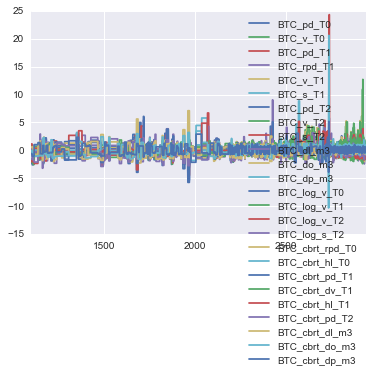

In [81]:
Y_all = join_by_date.join(targets, on='date').dropna()
groups = Y_all['date']
del Y_all['date']
cols = Y_all.columns
index = Y_all.index
#Y_all = pd.DataFrame(normalize(Y_all, axis=1, norm='l2'), columns=cols, index=index)
Y_all = Y_all - Y_all.mean()
Y_all = Y_all/Y_all.std()
Y_all.plot()

In [82]:
features = pd.concat([features_date, features_reactions], axis=1)

In [83]:
X_all = features.ix[Y_all.index]
X_all.shape

(1840, 7)

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import normalize

In [85]:
reg = RandomForestRegressor(n_estimators=10, max_depth=2, criterion='mse')

In [86]:
target_scores = {}
for indicator in targets.columns:
    Y =Y_all[indicator]    
    scores = cross_val_score(reg, X_all, Y, cv=5, groups=groups, scoring='neg_mean_squared_error')
    print np.mean(scores)
    target_scores[indicator] = scores

cv_score = pd.DataFrame(target_scores)

-1.09034402372
-1.69043256507
-1.09490594878
-1.00416587307
-1.80372923932
-1.05483225703
-1.05751760754
-1.75599843371
-1.0321296107
-1.06762737688
-1.12508646483
-1.03006198112
-1.38302665499
-1.37901312294
-1.2515209899
-1.05698293641
-1.0998898415
-1.14195927833
-1.04292935865
-0.971085845484
-1.05116430739
-1.04122365582
-1.04356675583
-1.11575384186
-1.02195419399


In [87]:
ms = cv_score.mean(axis=0)
ms.sort_values(ascending=False)

BTC_cbrt_dv_T1    -0.971086
BTC_rpd_T1        -1.004166
BTC_cbrt_dp_m3    -1.021954
BTC_dp_m3         -1.030062
BTC_s_T2          -1.032130
BTC_cbrt_pd_T2    -1.041224
BTC_cbrt_pd_T1    -1.042929
BTC_cbrt_dl_m3    -1.043567
BTC_cbrt_hl_T1    -1.051164
BTC_s_T1          -1.054832
BTC_log_s_T2      -1.056983
BTC_pd_T2         -1.057518
BTC_dl_m3         -1.067627
BTC_pd_T0         -1.090344
BTC_pd_T1         -1.094906
BTC_cbrt_rpd_T0   -1.099890
BTC_cbrt_do_m3    -1.115754
BTC_do_m3         -1.125086
BTC_cbrt_hl_T0    -1.141959
BTC_log_v_T2      -1.251521
BTC_log_v_T1      -1.379013
BTC_log_v_T0      -1.383027
BTC_v_T0          -1.690433
BTC_v_T2          -1.755998
BTC_v_T1          -1.803729
dtype: float64